In [12]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
def load_data(file):
    return np.loadtxt(file)

In [3]:
def euclidean(a,b):
    return np.linalg.norm(a-b)

In [15]:
def kmeans(k,centroids,dataset, n_instances, n_features):
    history_centroids = []
    distance = euclidean
    history_centroids.append(centroids)
    old_centroids = np.zeros(centroids.shape)
    belongs_to = np.zeros((n_instances,1))
    norm = distance(centroids,old_centroids)
    iteration = 0
    while norm > 0:
        iteration += 1
        old_centroids = centroids
        for idx_instance, instance in enumerate(dataset):
            dist_vec = np.zeros((k,1))
            for idx_centroid, centroid in enumerate(centroids):
                dist_vec[idx_centroid] = distance(centroid,instance)
                #dist_vec.append(distance(centroid,instance))
            belongs_to[idx_instance,0] = np.argmin(dist_vec)
            #belongs_to.append(np.argmin(dist_vec))
        temp_centroids = np.zeros((k,n_features))
        for idx in range(len(centroids)):
            instance_close = [i for i in range(len(belongs_to)) if belongs_to[i] == idx]
            centroid = np.mean(dataset[instance_close],axis=0)
            temp_centroids[idx, :] = centroid
        centroids = temp_centroids
        history_centroids.append(temp_centroids)
        norm = distance(centroids,old_centroids)
    return centroids, history_centroids, belongs_to

<function matplotlib.pyplot.show>

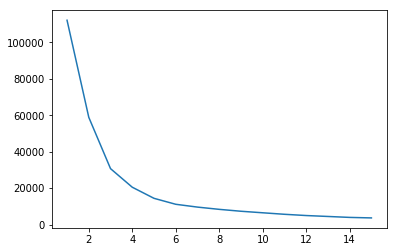

In [13]:
wcss = []
for i in range(1,16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 500, n_init=10, random_state=0).fit(dataset)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,16), wcss)
plt.show

In [17]:
dataset = load_data('TrainsetTugas2.txt')
n_instances, n_features = dataset.shape
centroids = dataset[np.random.randint(0,n_instances-1, size=6)]
print(centroids)
final_centroids, history_of_centroids, belongs_to_centroid = kmeans(6,centroids,dataset,n_instances, n_features)
for i in belongs_to_centroid:
    print(i,end=" ")

[[ 7.8   3.35]
 [11.4  18.3 ]
 [ 8.55 27.45]
 [19.25  6.6 ]
 [ 5.8  18.25]
 [11.85  9.8 ]]
[2.] [2.] [2.] [2.] [2.] [2.] [2.] [2.] [2.] [2.] [2.] [2.] [2.] [2.] [2.] [2.] [2.] [2.] [2.] [2.] [2.] [2.] [2.] [2.] [2.] [2.] [2.] [2.] [2.] [2.] [2.] [2.] [2.] [2.] [2.] [2.] [2.] [2.] [2.] [2.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.] [4.]